# PCA demonstration
### July 28, 2015

### When can we use PCA? What does it do?

- PCA is useful for identifying correlations between predictor features. We can discover latent features from the output components from performing principal component analysis.
- One potential negative of PCA is that components may be harder to interpret than the original features when models are fit on them. But on high-dimensionality datasets, this can actually provide meaning to data that may not have an obvious prior grouping.
- PCA can be used to drastically reduce the size of the feature space. This can make PCA good as a pre-processing step, especially when we have a lot of features but our data would not be enough to "fill" the space taken as given.
- Similarly, PCA is good for noise reduction, to try and improve our algorithms' abilities to fit to the underlying signal in the data.
- A reduced feature space can make it easier to visualize data that has a high dimensionality.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import decomposition, preprocessing
%matplotlib inline

# for interactive plotting with hover
import mpld3
from mpld3 import plugins

In [13]:
# data from www.gapminder.org/data/
filenames = ["completion_male.csv", "completion_female.csv", "income_per_person.csv",
             "employment_over_15.csv", "life_expectancy.csv"]
gapminder_data = []
for name in filenames: gapminder_data.append(pd.read_csv(name, index_col=0))
# create a dataframe with multiple features per country
df = pd.concat(gapminder_data, join="inner", axis=1)
df.head(5)

,completion_male,completion_female,income_per_person,employment,life_expectancy
country,,,,,
Afghanistan,NaN,NaN,1193.282161,56.000000,53.2
Albania,NaN,NaN,8090.423280,51.400002,74.5
Algeria,NaN,NaN,12088.087622,50.000000,74.8
Angola,NaN,NaN,5303.703307,75.500000,56.9
Argentina,97.91143,102.10666,12912.711243,58.400002,75.5


In [14]:
# keep only countries for which we have a complete set of features
# (no missing data in any of the columns)
df.dropna(axis=0, how="any", inplace=True)

# take the log of income_per_person 
# - this variable follows approximately a log-normal distribution
df.income_per_person = np.log(df.income_per_person)
df.head()

,completion_male,completion_female,income_per_person,employment,life_expectancy
country,,,,,
Argentina,97.91143,102.10666,9.465967,58.400002,75.5
Armenia,91.53127,94.58897,8.749288,39.400002,72.2
Austria,100.63802,101.12819,10.656714,57.099998,80.0
Azerbaijan,91.68856,90.66259,9.264091,59.299999,69.9
Bahamas,99.76959,96.84352,10.133238,66.900002,72.1


In [15]:
df.shape

(105, 5)

## Perform PCA

In [17]:
pca = decomposition.PCA(n_components=2)

# we need to scale data with mean = 0 and stdev = 1
scaled_data = preprocessing.scale(df)

pca.fit(scaled_data)
transformed = pca.transform(scaled_data)
# let's take a look at the first ten rows of the transformed data
print transformed[:10, :]

[[-1.03975554  0.23058621]
 [-0.67166986 -1.75975392]
 [-1.80668446  0.46156378]
 [-0.21292093  0.13139593]
 [-0.85548708  1.05467569]
 [-0.56685139  1.01592655]
 [-0.51592526 -0.39585543]
 [-1.38476499 -0.376583  ]
 [-0.48263095 -0.06380433]
 [ 1.20094548 -0.04428261]]


### Components

In [18]:
print pca.components_

[[-0.50283735 -0.50886538 -0.46864391  0.22640338 -0.46618131]
 [-0.01732469 -0.01884488  0.23200303  0.93671022  0.26094689]]


If we perform PCA on the unscaled data, the third feature (income_per_person) receives very little weight because its variance is much smaller than that of the rest of the features. 

In [37]:
pca_unscaled = decomposition.PCA(n_components=2)
pca_unscaled.fit(df)
print pca_unscaled.components_

[[-0.61657745 -0.74355248 -0.02973757  0.12911842 -0.22227476]
 [-0.08065149 -0.07316974 -0.00860175 -0.98849972 -0.1045746 ]]


#### Components are orthogonal to each other (dot product = 0)

In [19]:
np.dot(pca.components_[0], pca.components_[1])

6.9388939039072284e-17

#### Components are normaled to have length 1. 

In [20]:
(pca.components_.T**2).sum(axis=0)

array([ 1.,  1.])

#### Variance explained by the first two components. 

In [21]:
print pca.explained_variance_ratio_

[ 0.66304229  0.18088559]


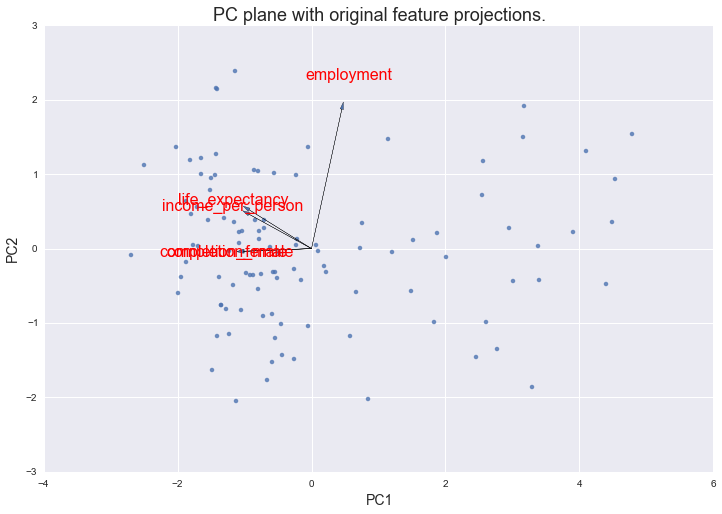

In [31]:
plt.figure(figsize=(12, 8))
sns.regplot(transformed[:, 0], transformed[:, 1], fit_reg=False)
feature_vectors = pca.components_.T
arrow_size, text_pos = 2.0, 2.5
for i, v in enumerate(feature_vectors):
    plt.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], 
              head_width=0.05, head_length=0.1)
    plt.text(v[0]*text_pos, v[1]*text_pos, df.columns[i], color='r', 
             ha='center', va='center', fontsize=16)
plt.xlabel("PC1", fontsize=14)
plt.ylabel("PC2", fontsize=14)
plt.title("PC plane with original feature projections.", fontsize=18)
plt.show()


## Difference in completion rates

In [23]:
# Let's take a look at the difference in completion rates: (male - female)
df_diff = df[["income_per_person", "employment", "life_expectancy"]].copy()
df_diff["diff_completion"] = df.completion_male - df.completion_female

In [24]:
pca_diff = decomposition.PCA(n_components=2)
scaled_diff = preprocessing.scale(df_diff)
pca_diff.fit(scaled_diff)
transformed_diff = pca_diff.transform(scaled_diff)
print transformed_diff[:10, :]

[[-0.90597675  0.19996421]
 [-0.80896797 -1.78711098]
 [-1.61095973  0.46755818]
 [-0.10251782  0.13118676]
 [-0.34930845  1.08249442]
 [-0.55596969  1.00061914]
 [-0.14798292 -0.36930313]
 [-1.88479375 -0.40214248]
 [ 0.64451439  0.06373349]
 [ 0.43596109 -0.08850266]]


In [25]:
print pca_diff.components_

[[-0.61386772  0.28749627 -0.59301754  0.43456014]
 [ 0.22922163  0.93388978  0.2657174   0.0685682 ]]


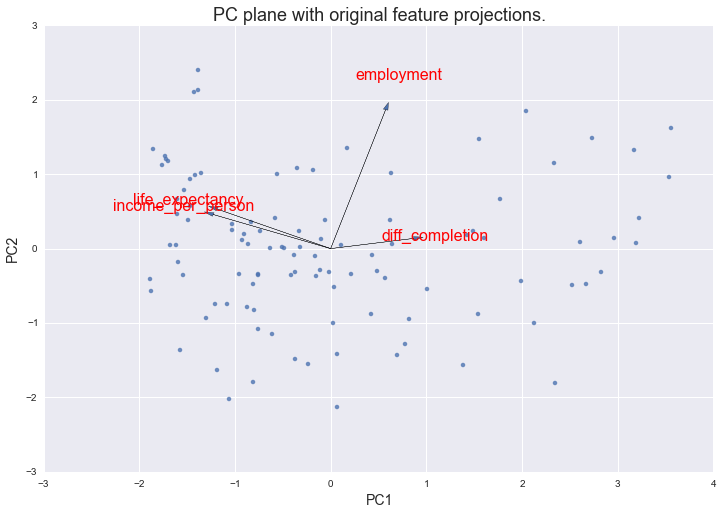

In [32]:
plt.figure(figsize=(12, 8))
sns.regplot(transformed_diff[:, 0], transformed_diff[:, 1], fit_reg=False)
feature_vectors_diff = pca_diff.components_.T
for i, v in enumerate(feature_vectors_diff):
    plt.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], 
              head_width=0.05, head_length=0.1)
    plt.text(v[0]*text_pos, v[1]*text_pos, df_diff.columns[i], color='r', 
             ha='center', va='center', fontsize=16)
plt.xlabel("PC1", fontsize=14)
plt.ylabel("PC2", fontsize=14)
plt.title("PC plane with original feature projections.", fontsize=18)
plt.show()

In [27]:
df_transform = pd.DataFrame(index=df.index, data=transformed_diff, columns=["PC1", "PC2"])

In [28]:
# merge dataframes based on index - "country"
# we now have a dataframe that contains both the components and the original features
df_transform = df_transform.join(df_diff)

In [29]:
# Example with modifications from:
# http://mpld3.github.io/examples/html_tooltips.html

# Define some CSS to control our custom labels

css = """
table
{
  border-collapse: collapse;
}
th
{
  color: #ffffff;
  background-color: #000000;
}
td
{
  background-color: #cccccc;
}
table, th, td
{
  font-family:Arial, Helvetica, sans-serif;
  border: 1px solid black;
  text-align: right;
}
"""

fig, ax = plt.subplots(figsize=(10, 6))

labels = []
for i in range(len(df_transform)):
    label = df_transform.ix[[i], :].T
    label.columns = [df_transform.index[i]]
    # .to_html() is unicode; so make leading 'u' go away with str()
    labels.append(str(label.to_html()))

points = ax.plot(df_transform.PC1, df_transform.PC2, 'o', color='b',
                 mec='k', ms=15, mew=1, alpha=.6)


ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Interactive projection on PC plane', size=20)

tooltip = plugins.PointHTMLTooltip(points[0], labels,
                                   voffset=10, hoffset=10, css=css)
plugins.connect(fig, tooltip)

mpld3.display()